In [71]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import plotly.express as px
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


In [3]:
#Get working directory
current_dir = os.getcwd()
#go one directory up to root directory
project_root_dir = os.path.dirname(current_dir)
#Define path to data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
#Define path to results folder
results_dir = os.path.join(project_root_dir, 'results')
#Define path to results folder
docs_dir = os.path.join(project_root_dir, 'docs')

#Create directories if they do not exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
os.makedirs(docs_dir, exist_ok=True)

In [5]:
merged_data_filename = os.path.join(processed_dir, "Video_Comments_DS.csv")
merged_df = pd.read_csv(merged_data_filename)
merged_df.head(5)

,videoId,authorDisplayName,textDisplay,commentLikeCount,commentPublishedAt,clean_text,title,videoPublishedAt,viewCount,videoLikeCount,commentCount,tags,description
0,UN5qgBk6MwY,@extavwudda,I am so sick of Lex sucking up to people,0,2025-06-25 06:08:24+00:00,sick lex sucking people,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null
1,UN5qgBk6MwY,@michealvallieres9228,Dude why would you interview a guy that's neve...,0,2025-06-23 23:40:40+00:00,dude would interview guy thats never met right...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null
2,UN5qgBk6MwY,@SequentialGeek,"Smug, ....awful,... soo much a$$ k!ssing with ...",0,2025-06-23 15:06:29+00:00,smug awful soo much kssing social media interv...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null
3,UN5qgBk6MwY,@scottychen2397,Are they psychedelic mushrooms . \n\nThat ‘ s ...,0,2025-06-23 05:02:10+00:00,psychedelic mushrooms inconsistent field resea...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null
4,UN5qgBk6MwY,@aysekayatech,Nothing is more inspiring than seeing hard wor...,29,2025-06-23 03:54:51+00:00,nothing inspiring seeing hard working brillian...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null


In [7]:
merged_df.columns

Index(['videoId', 'authorDisplayName', 'textDisplay', 'commentLikeCount',
       'commentPublishedAt', 'clean_text', 'title', 'videoPublishedAt',
       'viewCount', 'videoLikeCount', 'commentCount', 'tags', 'description'],
      dtype='object')

In [9]:
merged_df.shape

(4679, 13)

In [11]:
merged_df.describe()

,commentLikeCount,viewCount,videoLikeCount,commentCount
count,4679.000000,4.679000e+03,4679.000000,4679.000000
mean,17.583885,2.291692e+06,39731.718743,7932.296645
std,226.602432,2.769096e+06,51432.639837,14282.291871
min,0.000000,7.788900e+04,1780.000000,57.000000
25%,0.000000,7.581890e+05,11558.000000,1378.000000
50%,0.000000,1.405937e+06,22437.000000,3168.000000
75%,0.000000,2.400273e+06,41495.000000,7983.000000
max,6112.000000,1.670656e+07,271837.000000,77678.000000


In [13]:
merged_df.describe(include='object')

,videoId,authorDisplayName,textDisplay,commentPublishedAt,clean_text,title,videoPublishedAt,tags,description
count,4679,4679,4679,4679,4349,4679,4679,4679,4679
unique,94,3824,4616,4676,4243,94,94,87,92
top,pwN8u6HFH8U,@lexfridman,❤,2024-05-15 21:16:12+00:00,thank,"Paul Rosolie: Jungle, Apex Predators, Aliens, ...",2024-05-15 18:03:07+00:00,[],Null
freq,50,89,11,2,7,50,50,381,131


### 1. Publishing Trend Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_19108\3237642744.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['month'] = merged_df['videoPublishedAt'].dt.to_period('M').astype(str)


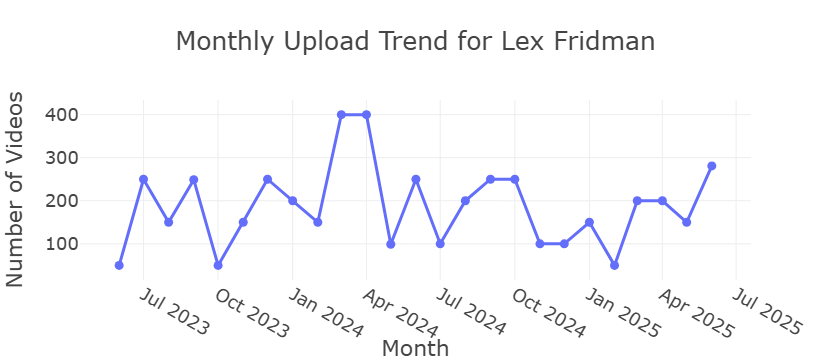

In [15]:
# Convert videoPublishedAt to datetime
merged_df['videoPublishedAt'] = pd.to_datetime(merged_df['videoPublishedAt'])

# Extract month
merged_df['month'] = merged_df['videoPublishedAt'].dt.to_period('M').astype(str)

# Count videos per month
monthly_counts = merged_df.groupby('month').size().reset_index(name='Video Count')

# Plot
fig = px.line(monthly_counts, x='month', y='Video Count',
              title='Monthly Upload Trend for Lex Fridman',
              markers=True)

fig.update_layout(template="presentation",
                  xaxis_title="Month",
                  yaxis_title="Number of Videos",
                  paper_bgcolor="rgba(0, 0, 0, 0)",
                  plot_bgcolor="rgba(0, 0, 0, 0)")

fig.show()

In [67]:
popularity_stats = merged_df[['viewCount', 'videoLikeCount', 'commentCount']].describe()
print(popularity_stats.loc[['mean', '50%', 'std']])

         viewCount  videoLikeCount  commentCount
mean  2.291692e+06    39731.718743   7932.296645
50%   1.405937e+06    22437.000000   3168.000000
std   2.769096e+06    51432.639837  14282.291871


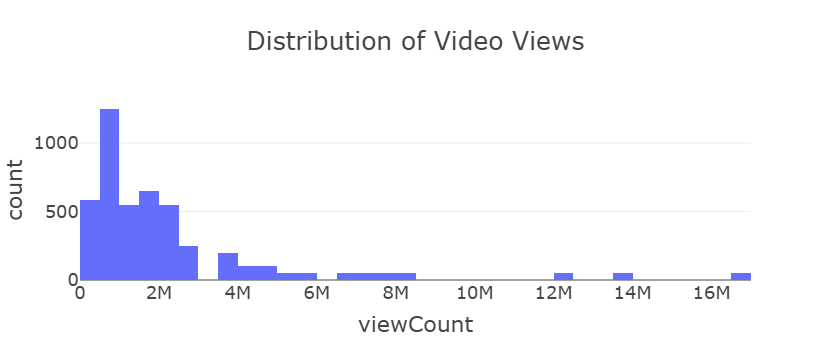

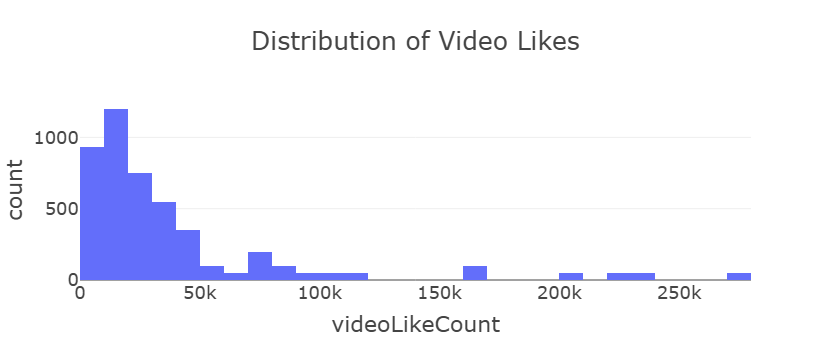

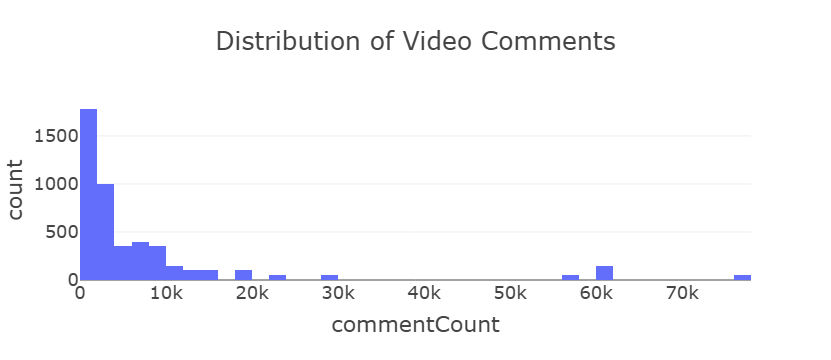

In [69]:
# Views Histogram
fig1 = px.histogram(merged_df, x='viewCount', nbins=50,
                    title='Distribution of Video Views')
fig1.update_layout(template='presentation')
fig1.show()

# Likes Histogram
fig2 = px.histogram(merged_df, x='videoLikeCount', nbins=50,
                    title='Distribution of Video Likes')
fig2.update_layout(template='presentation')
fig2.show()

# Comments Histogram
fig3 = px.histogram(merged_df, x='commentCount', nbins=50,
                    title='Distribution of Video Comments')
fig3.update_layout(template='presentation')
fig3.show()

In [73]:
# Function to assign sentiment label
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to cleaned text
merged_df['sentiment'] = merged_df['clean_text'].apply(get_sentiment)

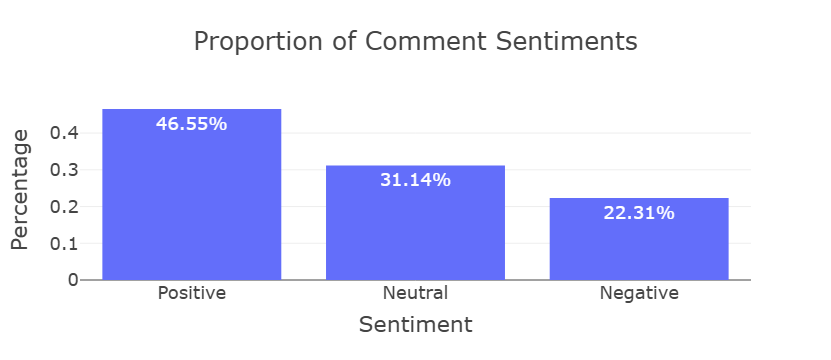

In [75]:
sentiment_counts = merged_df['sentiment'].value_counts(normalize=True).reset_index()
sentiment_counts.columns = ['Sentiment', 'Proportion']

fig = px.bar(sentiment_counts, x='Sentiment', y='Proportion',
             title='Proportion of Comment Sentiments',
             text=sentiment_counts['Proportion'].apply(lambda x: f'{x:.2%}'))

fig.update_layout(template='presentation', yaxis_title='Percentage')
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_19108\3658114663.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



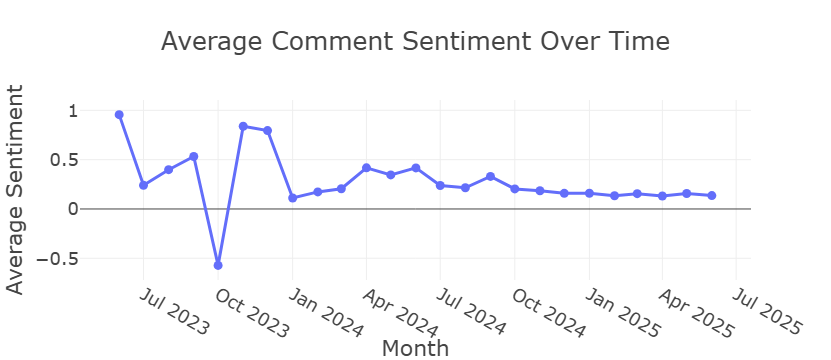

In [77]:
# Convert commentPublishedAt
merged_df['commentPublishedAt'] = pd.to_datetime(merged_df['commentPublishedAt'])

# Get compound score for time series
merged_df['sentiment_score'] = merged_df['clean_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Group by month
merged_df['comment_month'] = merged_df['commentPublishedAt'].dt.to_period('M').astype(str)
monthly_sentiment = merged_df.groupby('comment_month')['sentiment_score'].mean().reset_index()

# Plot
fig = px.line(monthly_sentiment, x='comment_month', y='sentiment_score',
              title='Average Comment Sentiment Over Time', markers=True)

fig.update_layout(template='presentation', xaxis_title='Month', yaxis_title='Average Sentiment')
fig.show()

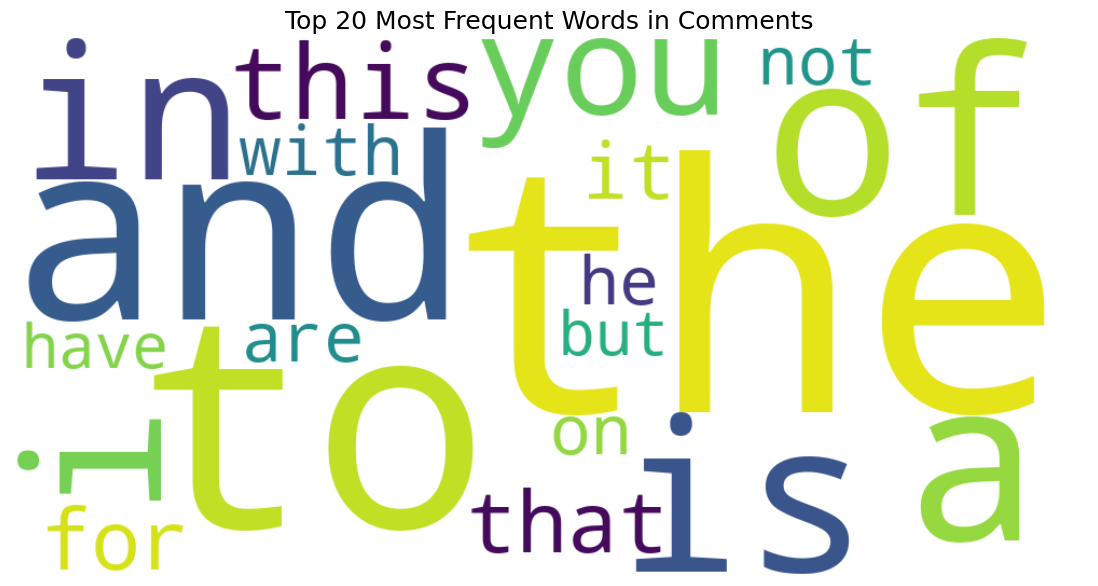

In [85]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize and count words
word_list = all_text.split()
word_freq = Counter(word_list)
top_20_words = dict(word_freq.most_common(20))

# Create word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(top_20_words)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 20 Most Frequent Words in Comments", fontsize=18)
plt.show()

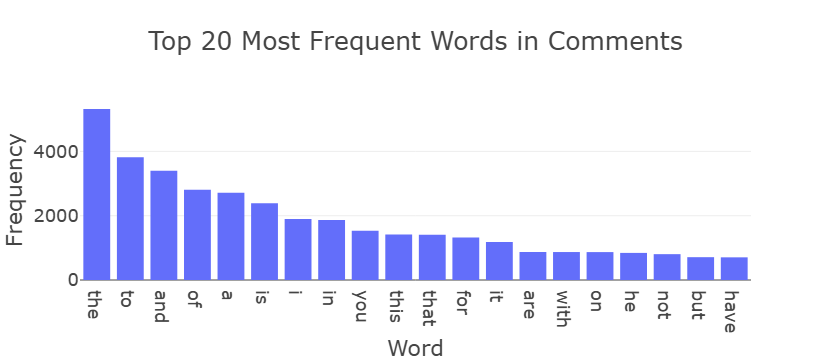

In [87]:
import pandas as pd
import plotly.express as px

# Turn word frequency dict into a DataFrame
word_freq_df = pd.DataFrame(top_20_words.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Plot
fig = px.bar(word_freq_df, x='Word', y='Count', title='Top 20 Most Frequent Words in Comments')
fig.update_layout(template='presentation', xaxis_title='Word', yaxis_title='Frequency')
fig.show()

In [95]:
merged_df['tags'].unique()

TypeError: unhashable type: 'list'

In [89]:
top_by_views = merged_df.sort_values(by='viewCount', ascending=False).head(20)

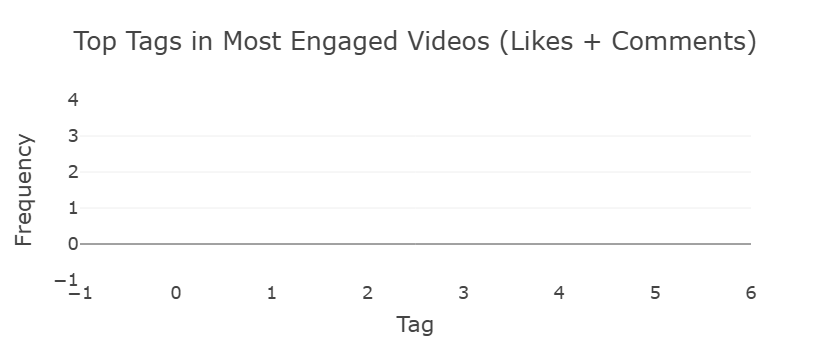

In [91]:
import ast
from collections import Counter

# Calculate engagement score
merged_df['engagement'] = merged_df['videoLikeCount'] + merged_df['commentCount']

# Top 20 most engaged videos
top_engaged = merged_df.sort_values(by='engagement', ascending=False).head(20)

# Parse and collect tags
engaged_tags = []
for tag_list in top_engaged['tags'].dropna():
    if isinstance(tag_list, str):
        try:
            tags = ast.literal_eval(tag_list) if tag_list.startswith("[") else [tag_list]
            engaged_tags.extend(tags)
        except:
            continue

# Count tag frequency
tag_counter = Counter(engaged_tags)
tag_df = pd.DataFrame(tag_counter.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

# Plot
fig = px.bar(tag_df.head(15), x='Tag', y='Count',
             title='Top Tags in Most Engaged Videos (Likes + Comments)')
fig.update_layout(template='presentation', xaxis_title='Tag', yaxis_title='Frequency')
fig.show()

In [17]:
merged_df[['viewCount', 'videoLikeCount', 'commentCount']].describe()

,viewCount,videoLikeCount,commentCount
count,4.679000e+03,4679.000000,4679.000000
mean,2.291692e+06,39731.718743,7932.296645
std,2.769096e+06,51432.639837,14282.291871
min,7.788900e+04,1780.000000,57.000000
25%,7.581890e+05,11558.000000,1378.000000
50%,1.405937e+06,22437.000000,3168.000000
75%,2.400273e+06,41495.000000,7983.000000
max,1.670656e+07,271837.000000,77678.000000


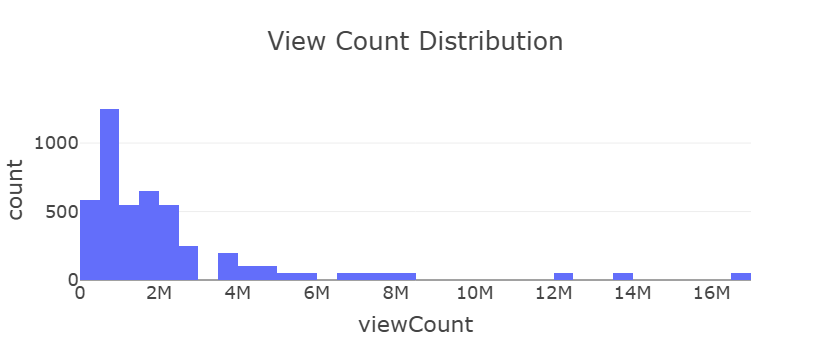

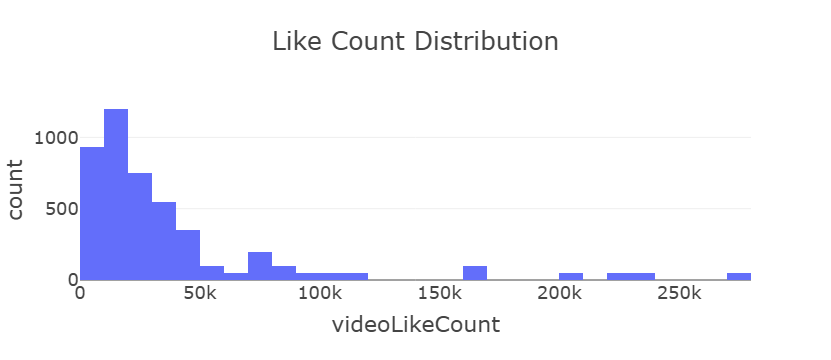

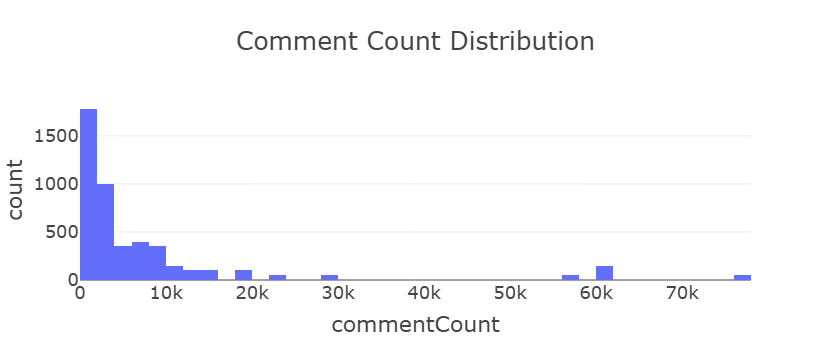

In [19]:
# Views
fig1 = px.histogram(merged_df, x='viewCount', nbins=50, title='View Count Distribution')
fig1.update_layout(template="presentation")
fig1.show()

# Likes
fig2 = px.histogram(merged_df, x='videoLikeCount', nbins=50, title='Like Count Distribution')
fig2.update_layout(template="presentation")
fig2.show()

# Comments
fig3 = px.histogram(merged_df, x='commentCount', nbins=50, title='Comment Count Distribution')
fig3.update_layout(template="presentation")
fig3.show()

In [21]:
metrics = ['viewCount', 'videoLikeCount', 'commentCount']

for col in metrics:
    mean_val = merged_df[col].mean()
    median_val = merged_df[col].median()
    std_val = merged_df[col].std()
    
    print(f"\n📊 {col} Stats:")
    print(f"Mean: {mean_val:,.0f}")
    print(f"Median: {median_val:,.0f}")
    print(f"Standard Deviation: {std_val:,.0f}")


📊 viewCount Stats:
Mean: 2,291,692
Median: 1,405,937
Standard Deviation: 2,769,096

📊 videoLikeCount Stats:
Mean: 39,732
Median: 22,437
Standard Deviation: 51,433

📊 commentCount Stats:
Mean: 7,932
Median: 3,168
Standard Deviation: 14,282


In [23]:
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
# Create 'clean_text' column if not already done
merged_df['clean_text'] = merged_df['textDisplay'].str.replace(r'<[^>]*>', '', regex=True)  # Remove HTML
merged_df['clean_text'] = merged_df['clean_text'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
merged_df['clean_text'] = merged_df['clean_text'].str.lower()  # Lowercase

# Apply to cleaned comment text
merged_df['sentiment'] = merged_df['clean_text'].apply(get_sentiment)
merged_df.head()

,videoId,authorDisplayName,textDisplay,commentLikeCount,commentPublishedAt,clean_text,title,videoPublishedAt,viewCount,videoLikeCount,commentCount,tags,description,month,sentiment
0,UN5qgBk6MwY,@extavwudda,I am so sick of Lex sucking up to people,0,2025-06-25 06:08:24+00:00,i am so sick of lex sucking up to people,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Negative
1,UN5qgBk6MwY,@michealvallieres9228,Dude why would you interview a guy that's neve...,0,2025-06-23 23:40:40+00:00,dude why would you interview a guy thats never...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Neutral
2,UN5qgBk6MwY,@SequentialGeek,"Smug, ....awful,... soo much a$$ k!ssing with ...",0,2025-06-23 15:06:29+00:00,smug awful soo much a kssing with these social...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Negative
3,UN5qgBk6MwY,@scottychen2397,Are they psychedelic mushrooms . \n\nThat ‘ s ...,0,2025-06-23 05:02:10+00:00,are they psychedelic mushrooms \n\nthat s no...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Positive
4,UN5qgBk6MwY,@aysekayatech,Nothing is more inspiring than seeing hard wor...,29,2025-06-23 03:54:51+00:00,nothing is more inspiring than seeing hard wor...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Negative


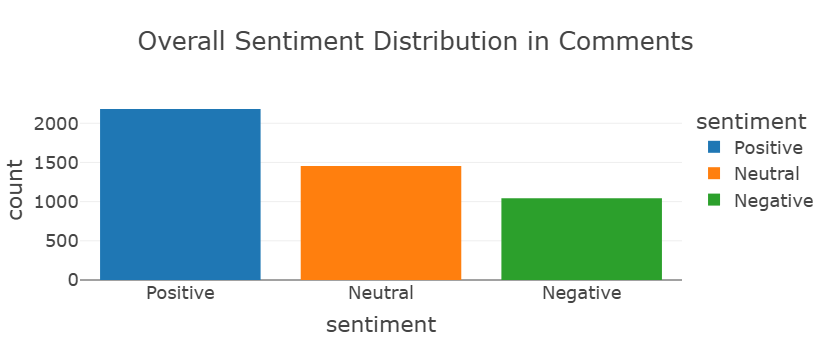

In [25]:
sentiment_counts = merged_df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

fig = px.bar(sentiment_counts, x='sentiment', y='count',
             title='Overall Sentiment Distribution in Comments',
             color='sentiment', template='presentation')

fig.show()

In [29]:
merged_df['commentPublishedAt'] = pd.to_datetime(merged_df['commentPublishedAt'])

C:\Users\user\AppData\Local\Temp\ipykernel_19108\1046376120.py:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



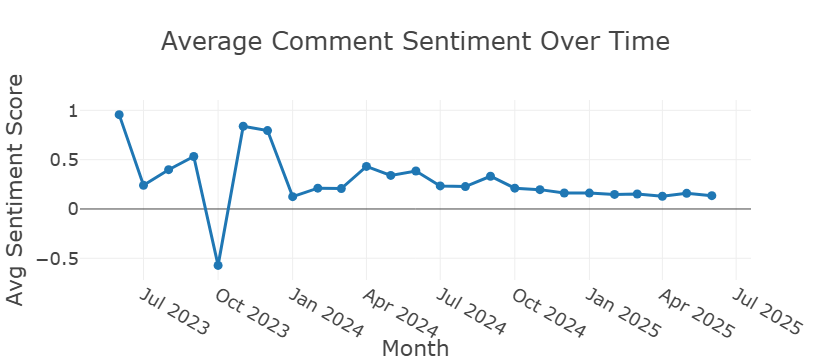

In [31]:
# Add datetime and score columns
merged_df['sentiment_score'] = merged_df['clean_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
merged_df['commentPublishedAt'] = pd.to_datetime(merged_df['commentPublishedAt'])

merged_df['month'] = merged_df['commentPublishedAt'].dt.to_period('M').astype(str)

# Average sentiment per month
monthly_sentiment = merged_df.groupby('month')['sentiment_score'].mean().reset_index()

fig = px.line(monthly_sentiment, x='month', y='sentiment_score',
              title='Average Comment Sentiment Over Time',
              markers=True, template='presentation')

fig.update_layout(xaxis_title='Month', yaxis_title='Avg Sentiment Score')
fig.show()

In [33]:
import nltk
nltk.download('punkt')        # usual tokenizer
nltk.download('punkt_tab')    # special tokenizer file (used in rare configs)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words and word.isalpha()]

merged_df['tokens'] = merged_df['clean_text'].apply(preprocess)
merged_df.head()

,videoId,authorDisplayName,textDisplay,commentLikeCount,commentPublishedAt,clean_text,title,videoPublishedAt,viewCount,videoLikeCount,commentCount,tags,description,month,sentiment,sentiment_score,tokens
0,UN5qgBk6MwY,@extavwudda,I am so sick of Lex sucking up to people,0,2025-06-25 06:08:24+00:00,i am so sick of lex sucking up to people,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Negative,-0.6418,"[sick, lex, sucking, people]"
1,UN5qgBk6MwY,@michealvallieres9228,Dude why would you interview a guy that's neve...,0,2025-06-23 23:40:40+00:00,dude why would you interview a guy thats never...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Neutral,0.0000,"[dude, would, interview, guy, thats, never, me..."
2,UN5qgBk6MwY,@SequentialGeek,"Smug, ....awful,... soo much a$$ k!ssing with ...",0,2025-06-23 15:06:29+00:00,smug awful soo much a kssing with these social...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Negative,-0.5267,"[smug, awful, soo, much, kssing, social, media..."
3,UN5qgBk6MwY,@scottychen2397,Are they psychedelic mushrooms . \n\nThat ‘ s ...,0,2025-06-23 05:02:10+00:00,are they psychedelic mushrooms \n\nthat s no...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Positive,0.3489,"[psychedelic, mushrooms, inconsistent, field, ..."
4,UN5qgBk6MwY,@aysekayatech,Nothing is more inspiring than seeing hard wor...,29,2025-06-23 03:54:51+00:00,nothing is more inspiring than seeing hard wor...,Terence Tao on Grigori Perelman declining the ...,2025-06-19 23:23:00+00:00,154515,3107,57,[],Null,2025-06,Negative,-0.4910,"[nothing, inspiring, seeing, hard, working, br..."


In [39]:
from collections import Counter

# Flatten all tokens
all_words = [word for tokens in merged_df['tokens'] for word in tokens]

# Count word frequency
word_freq = Counter(all_words).most_common(20)
word_freq_df = pd.DataFrame(word_freq, columns=['word', 'count'])
word_freq_df.head()

,word,count
0,lex,686
1,like,566
2,people,501
3,get,492
4,one,350


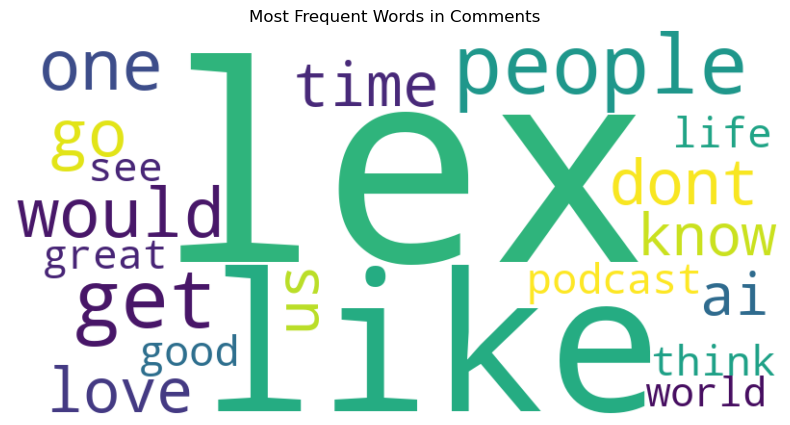

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Comments")
plt.show()

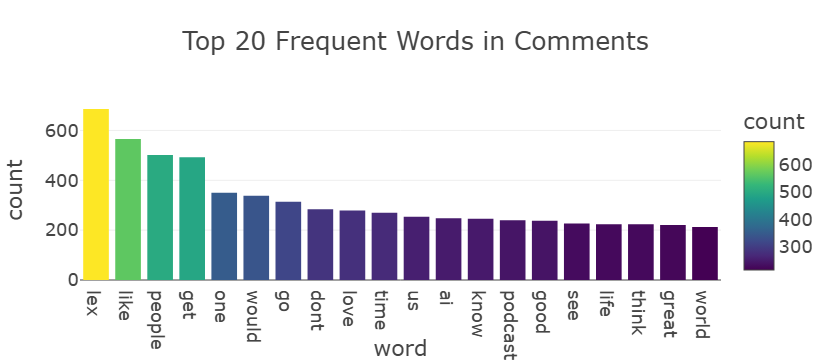

In [53]:
fig = px.bar(word_freq_df, x='word', y='count', title='Top 20 Frequent Words in Comments',
             template='presentation', color='count')
fig.show()

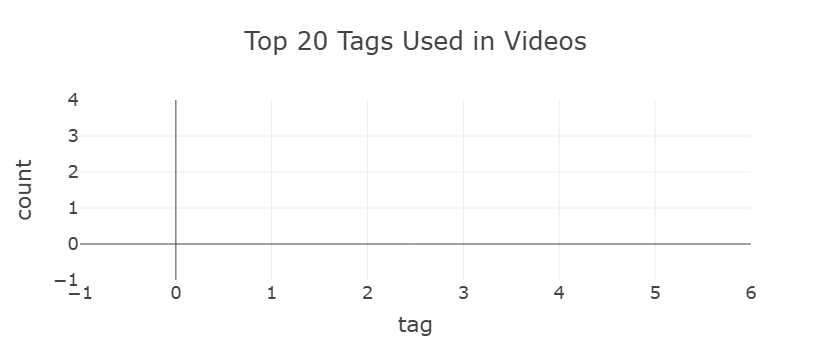

In [65]:
# If 'tags' column is a list of strings (or stringified list)
from ast import literal_eval

# Convert stringified list to actual list
merged_df['tags'] = merged_df['tags'].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])

# Flatten and count tags
all_tags = [tag for tags in merged_df['tags'] for tag in tags]
tag_freq = Counter(all_tags).most_common(20)
tag_df = pd.DataFrame(tag_freq, columns=['tag', 'count'])

fig = px.bar(tag_df, x='tag', y='count', title='Top 20 Tags Used in Videos',
             template='presentation', color='count')
fig.show()